<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [5]:
df= pd.read_csv("../data/raw/asset_price_data.csv")
df.head()

date    Asset1  Asset2     Asset3  Asset4  Asset5
0  2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1  2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2  2019-01-04  230.4026  56.129  26.147133  301.77   51.38
3  2019-01-07  230.0543  56.838  25.955277  302.33   52.14
4  2019-01-08  229.7012  56.895  26.137997  303.42   52.13

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
full_dates = pd.DataFrame({'date': pd.date_range(start='2019-01-02', end='2021-12-31', freq='D')})
df = pd.merge(full_dates, df, on='date', how='left')
df.fillna(method='ffill', inplace=True)

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_19156/3293616701.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
df.head(10)

date    Asset1  Asset2     Asset3  Asset4  Asset5
0 2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1 2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2 2019-01-04  230.4026  56.129  26.147133  301.77   51.38
3 2019-01-05  230.4026  56.129  26.147133  301.77   51.38
4 2019-01-06  230.4026  56.129  26.147133  301.77   51.38
5 2019-01-07  230.0543  56.838  25.955277  302.33   52.14
6 2019-01-08  229.7012  56.895  26.137997  303.42   52.13
7 2019-01-09  230.1550  57.630  26.197380  304.67   52.86
8 2019-01-10  230.4994  57.667  26.348124  304.78   52.89
9 2019-01-11  230.8193  57.692  26.370964  305.27   52.81

In [9]:
# Normalize all asset prices to start at the same value 100
normalized_df = df.copy()
assets = ["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"]
for asset in assets:
    normalized_df[asset] = normalized_df[asset] / normalized_df[asset].iloc[0] * 100

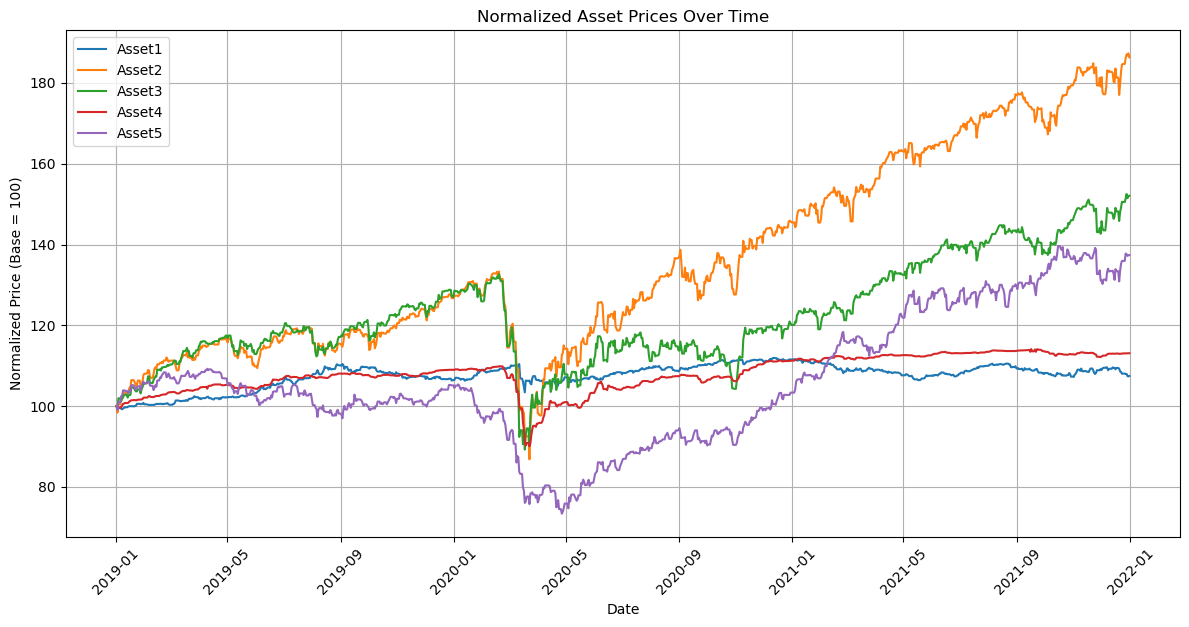

In [10]:
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(normalized_df["date"], normalized_df[asset], label=asset)

plt.title("Normalized Asset Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [13]:
returns_df = df.copy()
for asset in assets:
    returns_df[asset] = df[asset].pct_change() * 100  # percentage change

In [14]:
returns_df = returns_df.dropna()

In [15]:
returns_df

date    Asset1    Asset2    Asset3    Asset4    Asset5
1    2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2    2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
3    2019-01-05  0.000000  0.000000  0.000000  0.000000  0.000000
4    2019-01-06  0.000000  0.000000  0.000000  0.000000  0.000000
5    2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
...         ...       ...       ...       ...       ...       ...
1090 2021-12-27 -0.091306  0.738415  0.543901  0.000000  1.344319
1091 2021-12-28  0.006442  0.548309  0.759918  0.000000 -0.114106
1092 2021-12-29 -0.486243 -0.158812 -0.664707  0.017523 -0.314151
1093 2021-12-30 -0.069556  0.290341  0.334577  0.026280  0.143246
1094 2021-12-31  0.082881 -0.532184  0.051302  0.011677  0.000000

[1094 rows x 6 columns]

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [17]:
correlation_matrix = returns_df[assets].corr()

In [18]:
correlation_matrix

Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.087596 -0.060744  0.102653 -0.105994
Asset2 -0.087596  1.000000  0.852598  0.527073  0.591751
Asset3 -0.060744  0.852598  1.000000  0.511903  0.557725
Asset4  0.102653  0.527073  0.511903  1.000000  0.421542
Asset5 -0.105994  0.591751  0.557725  0.421542  1.000000

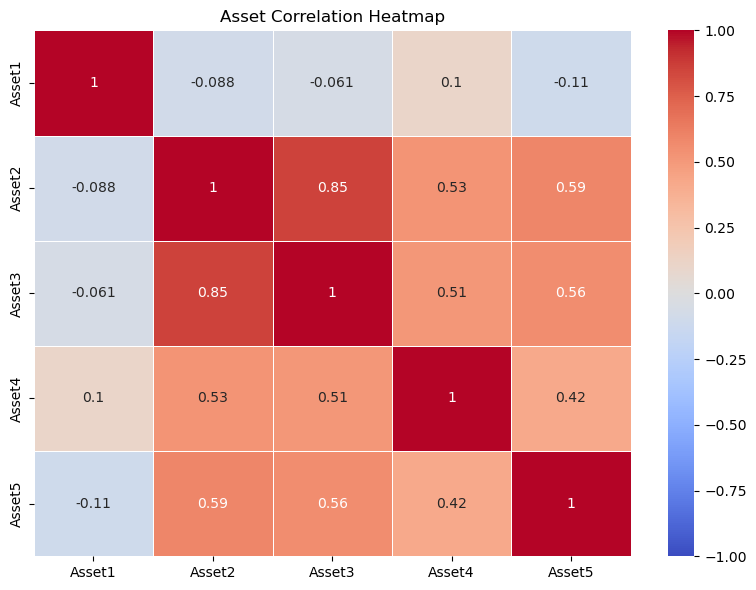

In [19]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Asset Correlation Heatmap")
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

#### Asset2 and Asset3 (0.85 correlation) show a very high positive correlation.
#### Holding both assets significantly increases exposure to similar risks or opportunities.

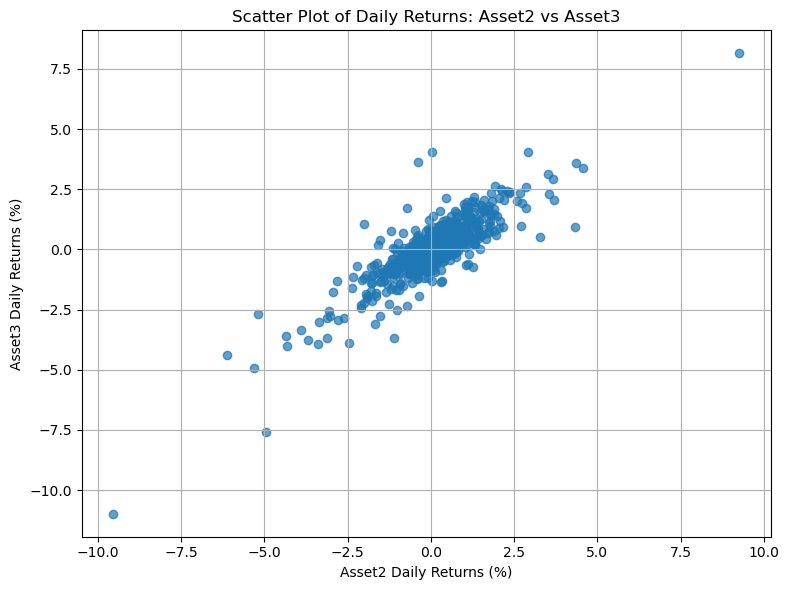

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(returns_df["Asset2"], returns_df["Asset3"], alpha=0.7)
plt.title("Scatter Plot of Daily Returns: Asset2 vs Asset3")
plt.xlabel("Asset2 Daily Returns (%)")
plt.ylabel("Asset3 Daily Returns (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

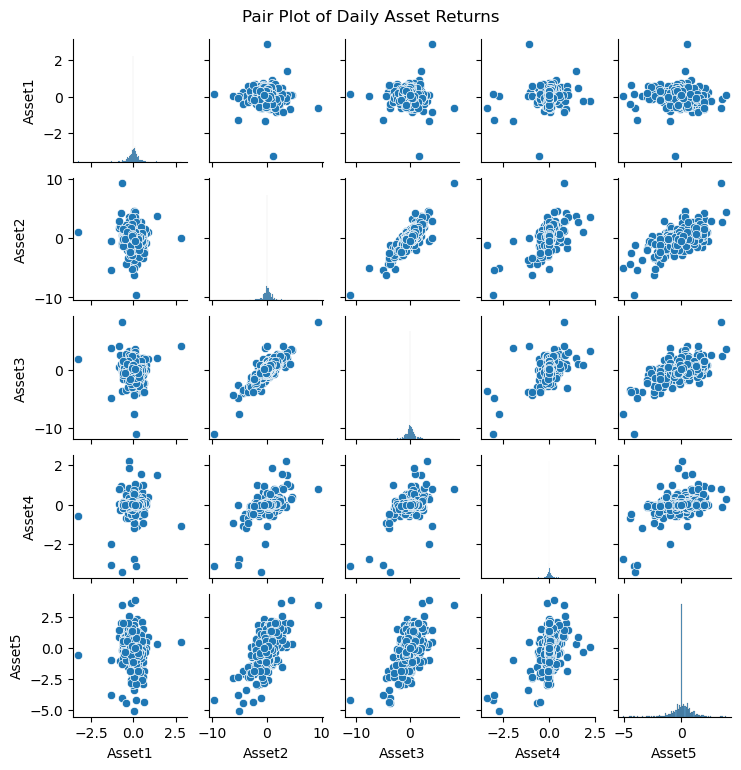

In [23]:
sns.pairplot(returns_df, height=1.5, aspect=1.0)
plt.suptitle("Pair Plot of Daily Asset Returns", y=1.02)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [25]:
df_weights= pd.read_csv("../data/raw/portfolio_weights.csv")
df_weights["date"] = pd.to_datetime(df_weights["date"])
df_weights

date    Asset1    Asset2    Asset3   Asset4    Asset5
0   2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1   2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2   2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3   2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
4   2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
..         ...       ...       ...       ...      ...       ...
778 2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
779 2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
780 2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
781 2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
782 2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[783 rows x 6 columns]

In [26]:
df_weights = pd.merge(full_dates, df_weights, on='date', how='left')
df_weights.fillna(method='ffill', inplace=True)

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_19156/3027085406.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weights.fillna(method='ffill', inplace=True)


In [27]:
df_weights

date    Asset1    Asset2    Asset3   Asset4    Asset5
0    2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1    2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2    2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3    2019-01-05  0.225458  0.116255  0.265003  0.23031  0.162974
4    2019-01-06  0.225458  0.116255  0.265003  0.23031  0.162974
...         ...       ...       ...       ...      ...       ...
1090 2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
1091 2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
1092 2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
1093 2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
1094 2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[1095 rows x 6 columns]

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

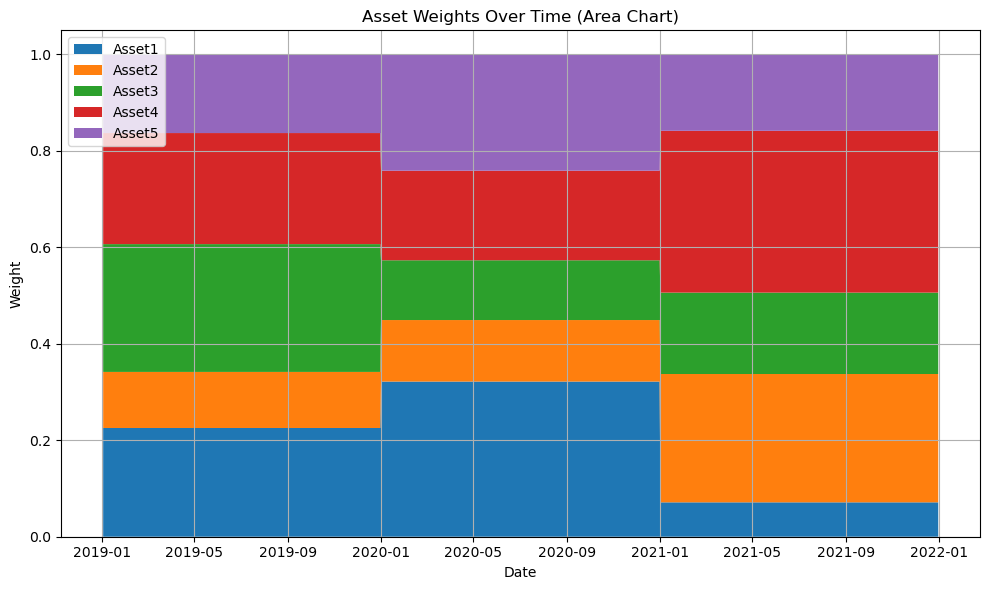

In [29]:
plt.figure(figsize=(10, 6))
plt.stackplot(df_weights["date"], 
              df_weights["Asset1"], df_weights["Asset2"], df_weights["Asset3"],
              df_weights["Asset4"], df_weights["Asset5"],
              labels=["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"])

plt.title("Asset Weights Over Time (Area Chart)")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [31]:
df["date"] = pd.to_datetime(df["date"])
df_weights["date"] = pd.to_datetime(df_weights["date"])
df.set_index("date", inplace=True)
df_weights.set_index("date", inplace=True)

# Calculate daily returns of each asset
daily_returns = df.pct_change(fill_method=None)

# Multiply returns by weights
# This gives the portfolio return for each day
portfolio_daily_returns = (daily_returns * df_weights).sum(axis=1)

# Calculate cumulative return
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
portfolio_cumulative_returns

date
2019-01-02    1.000000
2019-01-03    0.994003
2019-01-04    1.005322
2019-01-05    1.005322
2019-01-06    1.005322
                ...   
2021-12-27    1.384885
2021-12-28    1.388438
2021-12-29    1.385203
2021-12-30    1.387423
2021-12-31    1.385714
Length: 1095, dtype: float64

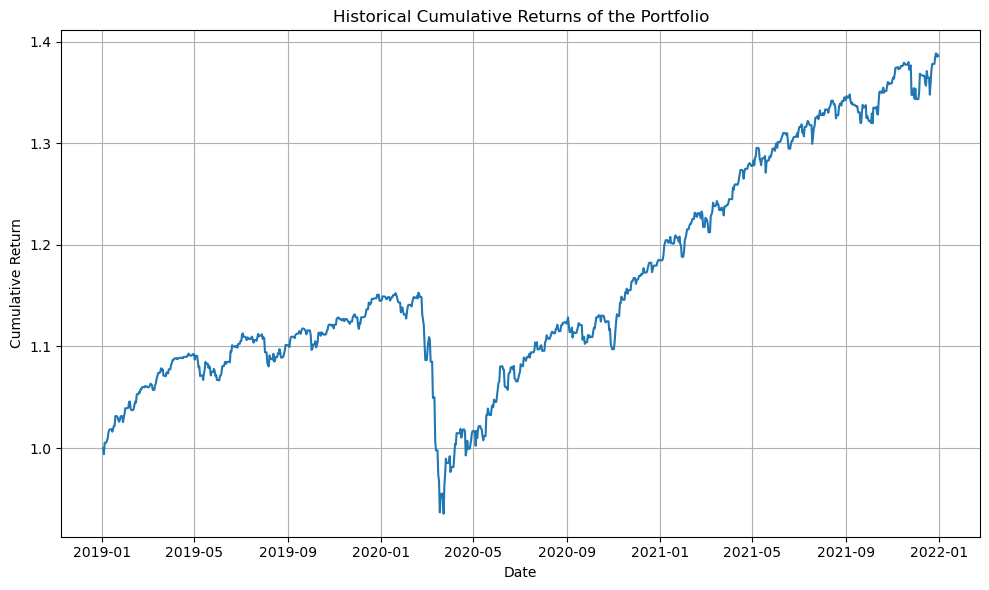

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns)
plt.title("Historical Cumulative Returns of the Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Daily Returns of the Portfolio.</h2>

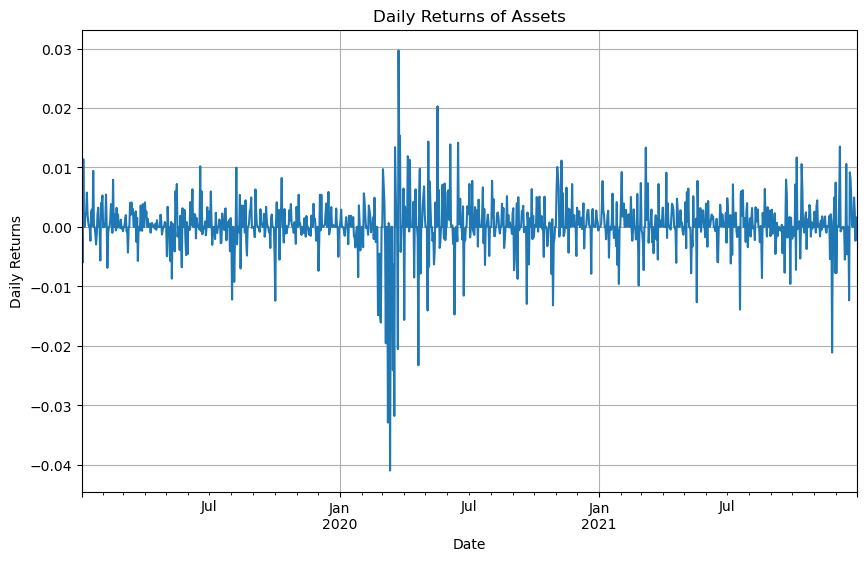

In [34]:
portfolio_daily_returns.plot(figsize=(10,6), title='Daily Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [36]:
# Calculate the total period in years 2019-2021 (365 + 366 + 365/3)
total_days = (portfolio_cumulative_returns.index[-1] - portfolio_cumulative_returns.index[0]).days
total_years = total_days / 365.25

# Portfolio Initial and Final Values
initial_portfolio_value = portfolio_cumulative_returns.iloc[0]
final_portfolio_value = portfolio_cumulative_returns.iloc[-1]

# Annualized Return for the Total Portfolio
portfolio_annualized_return = (final_portfolio_value / initial_portfolio_value)**(1 / total_years) - 1

# Annualized Return per asset
initial_asset_values = df.iloc[0]
final_asset_values = df.iloc[-1]
annualized_returns_assets = (final_asset_values / initial_asset_values)**(1 / total_years) - 1

# Compile into a clear DataFrame
results = pd.DataFrame({
    'Initial Value': initial_asset_values.round(2),
    'Final Value': final_asset_values.round(2),
    'Annualized Return (%)': (annualized_returns_assets * 100).round(2)
})

# Append the portfolio totals clearly
results.loc['Total Portfolio'] = [
    round(initial_portfolio_value, 2), 
    round(final_portfolio_value, 2), 
    round(portfolio_annualized_return * 100, 2)
]


results

Initial Value  Final Value  Annualized Return (%)
Asset1                  231.51       248.75                   2.43
Asset2                   55.88       104.11                  23.09
Asset3                   25.65        39.01                  15.02
Asset4                  302.93       342.59                   4.19
Asset5                   50.89        69.91                  11.18
Total Portfolio           1.00         1.39                  11.51

<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [38]:
# Annualized volatility (using 261 trading days)
trading_days_per_year = 261

# Daily volatility (standard deviation) of assets and portfolio
daily_volatility_assets = daily_returns.std()
daily_volatility_portfolio = portfolio_daily_returns.std()

# Annualize volatility
annualized_vol_assets = daily_volatility_assets * (trading_days_per_year ** 0.5) * 100
annualized_vol_portfolio = daily_volatility_portfolio * (trading_days_per_year ** 0.5) * 100

# Combine neatly into a DataFrame matching your earlier table format
volatility_table = pd.DataFrame({
    'Initial Value': df.iloc[0].round(2),
    'Final Value': df.iloc[-1].round(2),
    'Annualized Volatility (%)': annualized_vol_assets.round(2)
})


volatility_table.loc['Total Portfolio'] = [
    round(portfolio_cumulative_returns.iloc[0], 2),
    round(portfolio_cumulative_returns.iloc[-1], 2),
    round(annualized_vol_portfolio, 2)
]

volatility_table

Initial Value  Final Value  Annualized Volatility (%)
Asset1                  231.51       248.75                       4.08
Asset2                   55.88       104.11                      16.41
Asset3                   25.65        39.01                      15.95
Asset4                  302.93       342.59                       4.54
Asset5                   50.89        69.91                      12.89
Total Portfolio           1.00         1.39                       7.20

<h2 style="color: #FF6347;">Trailing Returns.</h2>

In [40]:
trailing_periods = {
    '1 Month': 21,
    '3 Months': 63,
    '6 Months': 126,
    '1 Year': 261
}

total_returns = {}
annualized_returns = {}
annualized_volatility = {}

# Loop through each trailing period clearly
for period_name, period_days in trailing_periods.items():
    end_date = portfolio_daily_returns.index.max()
    start_date = end_date - pd.Timedelta(days=period_days)

    # Trailing returns data
    trailing_returns = portfolio_daily_returns.loc[start_date:end_date]

    # Calculate metrics
    total_ret = (1 + trailing_returns).prod() - 1
    annual_ret = (1 + total_ret)**(261 / period_days) - 1
    annual_vol = trailing_returns.std() * np.sqrt(261)

    # Store results
    total_returns[period_name] = total_ret * 100
    annualized_returns[period_name] = annual_ret * 100
    annualized_volatility[period_name] = annual_vol * 100

portfolio_summary = pd.DataFrame({
    'Total Return (%)': total_returns,
    'Annualized Return (%)': annualized_returns,
    'Annualized Volatility (%)': annualized_volatility
}).T.round(2)


print("Portfolio Trailing Performance Summary:")
portfolio_summary

Portfolio Trailing Performance Summary:


1 Month  3 Months  6 Months  1 Year
Total Return (%)              1.37      1.95      3.64    9.92
Annualized Return (%)        18.44      8.35      7.69    9.92
Annualized Volatility (%)     8.07      7.82      6.88    6.08

<h2 style="color: #FF6347;">Portfolio Allocation.</h2>

In [42]:
# Get the latest available date weights from df_weights
latest_date = df_weights.index.max()
latest_weights = df_weights.loc[latest_date]

# Prepare the allocation table clearly
allocation_table = pd.DataFrame({
    'Portfolio Allocation (%)': (latest_weights * 100).round(2)
})


print("Portfolio Allocation Table (as of {})".format(latest_date.date()))
allocation_table

Portfolio Allocation Table (as of 2021-12-31)


Portfolio Allocation (%)
Asset1                      7.13
Asset2                     26.61
Asset3                     16.88
Asset4                     33.55
Asset5                     15.84

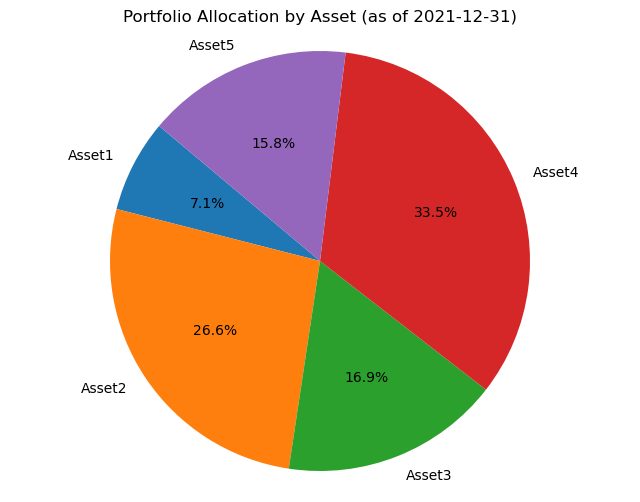

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(
    allocation_table['Portfolio Allocation (%)'],
    labels=allocation_table.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title(f'Portfolio Allocation by Asset (as of {latest_date.date()})')
plt.axis('equal')  # Ensure pie chart is circular
plt.show()

<h2 style="color: #FF6347;">Portfolio Growth.</h2>

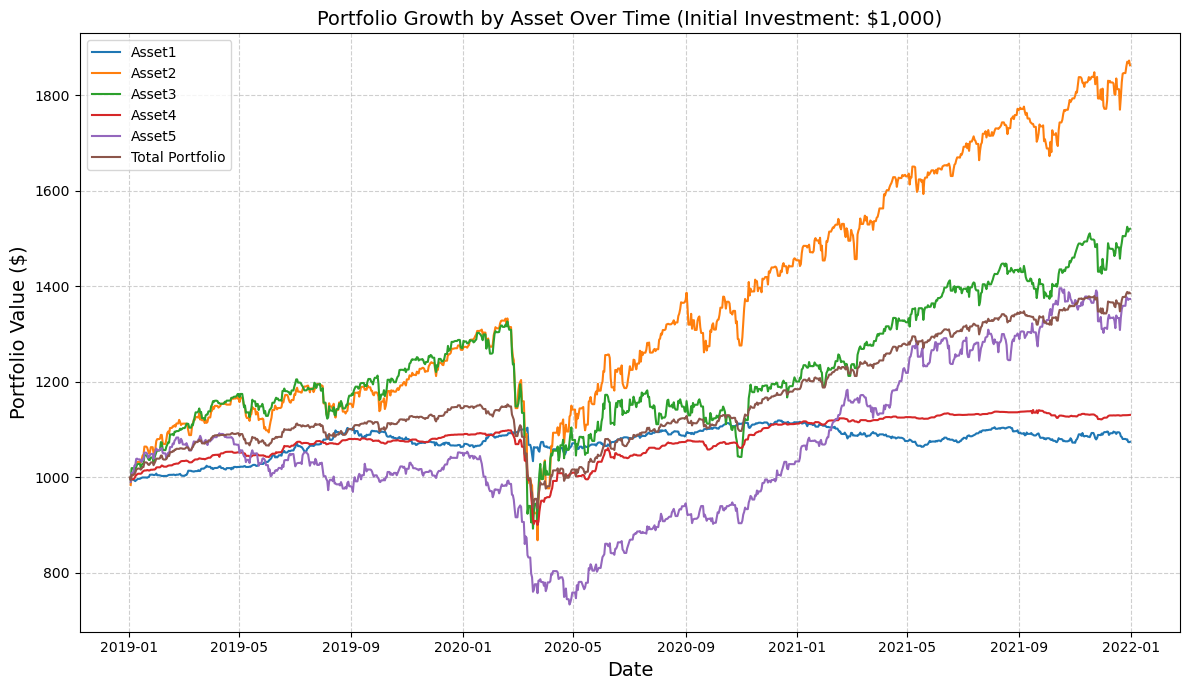

In [45]:
# Calculate cumulative returns for each asset (growth of $1,000 invested initially)
initial_investment = 1000
cumulative_returns_assets_1000 = (1 + daily_returns).cumprod() * initial_investment

# Calculate cumulative return for the total portfolio (initial $1,000)
cumulative_returns_assets_1000['Total Portfolio'] = portfolio_cumulative_returns * initial_investment

# Plot the portfolio growth by asset over time clearly
plt.figure(figsize=(12, 7))

for column in cumulative_returns_assets_1000.columns:
    plt.plot(cumulative_returns_assets_1000.index, cumulative_returns_assets_1000[column], label=column)

plt.title('Portfolio Growth by Asset Over Time (Initial Investment: $1,000)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Value ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

In [47]:
asset_info= pd.read_csv("../data/raw/asset_information_data.csv")
asset_info

Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative

In [48]:
category_map = dict(zip(asset_info["Name"], asset_info["Family"].str.lower().str.replace(" ", "_")))
category_map

{'Asset1': 'fixed_income',
 'Asset2': 'fixed_income',
 'Asset3': 'equity',
 'Asset4': 'equity',
 'Asset5': 'alternative'}

/var/folders/yn/zzdysdkj6_z0rns53nqvdbvr0000gn/T/ipykernel_19156/1540360643.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_grouped = df_weights_renamed.groupby(axis=1, level=0).sum()


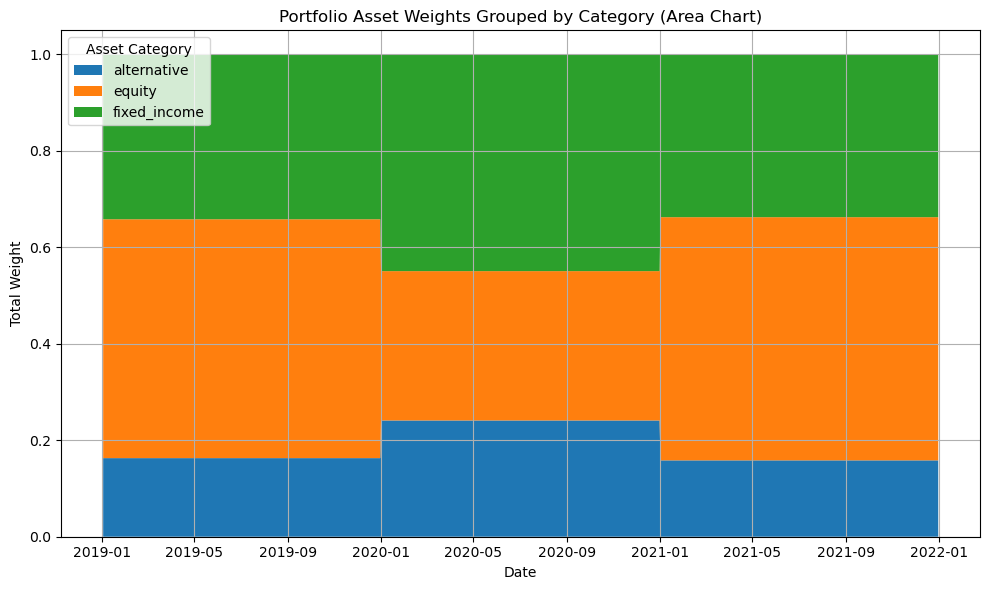

In [49]:
df_weights_renamed = df_weights.rename(columns=category_map)
df_grouped = df_weights_renamed.groupby(axis=1, level=0).sum()

plt.figure(figsize=(10, 6))
plt.stackplot(df_grouped.index, [df_grouped[col] for col in df_grouped.columns],
              labels=df_grouped.columns)

plt.title("Portfolio Asset Weights Grouped by Category (Area Chart)")
plt.xlabel("Date")
plt.ylabel("Total Weight")
plt.legend(loc="upper left", title="Asset Category")
plt.tight_layout()
plt.grid(True)
plt.show()

In [50]:
# 1. Create a complete date range (including non-business days if needed)
full_range = pd.date_range(start="2019-01-02", end="2021-12-31", freq="D")  # "D" = calendar days

# 2. Reindex the DataFrame to include all those dates
df_weights_reindex = df_weights.reindex(full_range)

# 3. Forward-fill missing values with the previous day's value
df_weights_reindex = df_weights_reindex.ffill()

# 4. Rename index to 'date' (optional, for clarity)
df_weights_reindex.index.name = "date"
df_weights_reindex

Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-05  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-06  0.225458  0.116255  0.265003  0.23031  0.162974
...              ...       ...       ...      ...       ...
2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[1095 rows x 5 columns]

In [51]:
# 1. Create a complete date range (including non-business days if needed)
full_range = pd.date_range(start="2019-01-02", end="2021-12-31", freq="D")  # "D" = calendar days

# 2. Reindex the DataFrame to include all those dates
df_price_reindex = df.reindex(full_range)

# 3. Forward-fill missing values with the previous day's value
df_price_reindex = df_price_reindex.ffill()

# 4. Rename index to 'date' (optional, for clarity)
df_price_reindex.index.name = "date"
df_price_reindex

Asset1   Asset2     Asset3  Asset4  Asset5
date                                                    
2019-01-02  231.5061   55.875  25.649222  302.93   50.89
2019-01-03  231.0356   54.977  25.503047  302.11   50.41
2019-01-04  230.4026   56.129  26.147133  301.77   51.38
2019-01-05  230.4026   56.129  26.147133  301.77   51.38
2019-01-06  230.4026   56.129  26.147133  301.77   51.38
...              ...      ...        ...     ...     ...
2021-12-27  249.9207  103.956  38.820000  342.40   70.11
2021-12-28  249.9368  104.526  39.115000  342.40   70.03
2021-12-29  248.7215  104.360  38.855000  342.46   69.81
2021-12-30  248.5485  104.663  38.985000  342.55   69.91
2021-12-31  248.7545  104.106  39.005000  342.59   69.91

[1095 rows x 5 columns]

In [52]:
df_price_reindex = df_price_reindex.reset_index().melt(id_vars="date", var_name="asset", value_name="price")

In [53]:
df_price_reindex

date   asset     price
0    2019-01-02  Asset1  231.5061
1    2019-01-03  Asset1  231.0356
2    2019-01-04  Asset1  230.4026
3    2019-01-05  Asset1  230.4026
4    2019-01-06  Asset1  230.4026
...         ...     ...       ...
5470 2021-12-27  Asset5   70.1100
5471 2021-12-28  Asset5   70.0300
5472 2021-12-29  Asset5   69.8100
5473 2021-12-30  Asset5   69.9100
5474 2021-12-31  Asset5   69.9100

[5475 rows x 3 columns]

In [54]:
df_weights_reindex = df_weights_reindex.reset_index().melt(id_vars="date", var_name="asset", value_name="weights")

In [55]:
df_weights_reindex

date   asset   weights
0    2019-01-02  Asset1  0.225458
1    2019-01-03  Asset1  0.225458
2    2019-01-04  Asset1  0.225458
3    2019-01-05  Asset1  0.225458
4    2019-01-06  Asset1  0.225458
...         ...     ...       ...
5470 2021-12-27  Asset5  0.158356
5471 2021-12-28  Asset5  0.158356
5472 2021-12-29  Asset5  0.158356
5473 2021-12-30  Asset5  0.158356
5474 2021-12-31  Asset5  0.158356

[5475 rows x 3 columns]

In [56]:
df_merged = pd.merge(df_price_reindex, df_weights_reindex, on=["date", "asset"], how="inner")

In [57]:
asset_info = asset_info.rename(columns={"Name": "asset"})

In [58]:
df_merged = pd.merge(df_merged, asset_info, on="asset", how="left")

In [59]:
df_merged

date   asset     price   weights        Family
0    2019-01-02  Asset1  231.5061  0.225458  Fixed Income
1    2019-01-03  Asset1  231.0356  0.225458  Fixed Income
2    2019-01-04  Asset1  230.4026  0.225458  Fixed Income
3    2019-01-05  Asset1  230.4026  0.225458  Fixed Income
4    2019-01-06  Asset1  230.4026  0.225458  Fixed Income
...         ...     ...       ...       ...           ...
5470 2021-12-27  Asset5   70.1100  0.158356   Alternative
5471 2021-12-28  Asset5   70.0300  0.158356   Alternative
5472 2021-12-29  Asset5   69.8100  0.158356   Alternative
5473 2021-12-30  Asset5   69.9100  0.158356   Alternative
5474 2021-12-31  Asset5   69.9100  0.158356   Alternative

[5475 rows x 5 columns]

In [60]:
#df_merged.to_csv("df_merged.csv")